# Модуль 2 Изучение параметров, влияющих на целевую переменную. Предварительная подготовка данных.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


font = 16
sns.set(font_scale=1.4)

## 1. ОПРЕДЕЛЕНИЕ РАССТОЯНИЯ МЕЖДУ СХЕМАМИ ПРОЗВУЧИВАНИЯ

 

In [9]:
df = pd.read_csv('df.csv')
numeric_columns = [col for col in df.columns if col not in ['filename', 'index']]
df.head(5)

,filename,index,schema_1,schema_2,schema_3,schema_4,schema_5,schema_6,schema_7,schema_8,schema_9,schema_10,schema_11,schema_12,schema_13,schema_14,schema_15,schema_16
0,SOP1.dat,1,0,35,202,27,29,35,0,0,255,147,54,119,125,212,17,39
1,SOP1.dat,2,0,23,190,27,22,29,0,0,255,147,56,95,156,223,13,27
2,SOP1.dat,3,1,0,188,24,10,13,0,0,255,145,59,40,172,254,10,0
3,SOP1.dat,4,5,0,183,26,6,1,0,0,255,153,66,22,172,255,7,0
4,SOP1.dat,5,4,0,188,32,4,0,0,0,255,157,62,18,170,255,14,21


Корреляция Пирсона:

<AxesSubplot:>

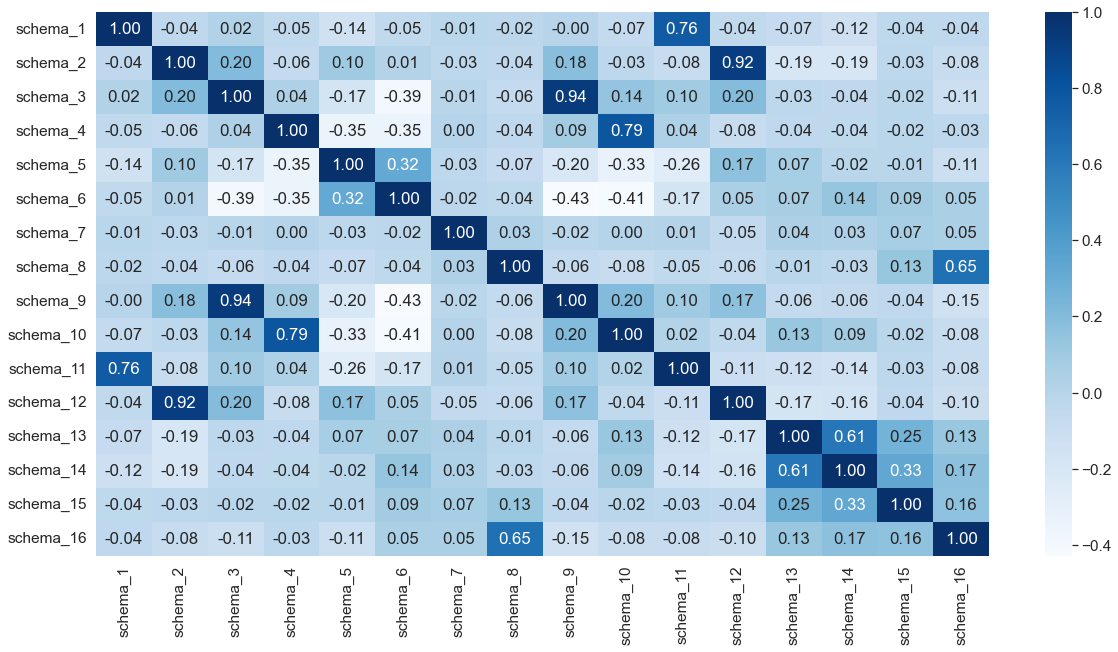

In [12]:
corr = df[df.filename == 'SOP1.dat'][numeric_columns].corr(method='pearson')
plt.figure(figsize=(20, 10))
sns.heatmap(corr, cmap='Blues', annot=True, fmt='.2f')

Корреляция Спирмана:

<AxesSubplot:>

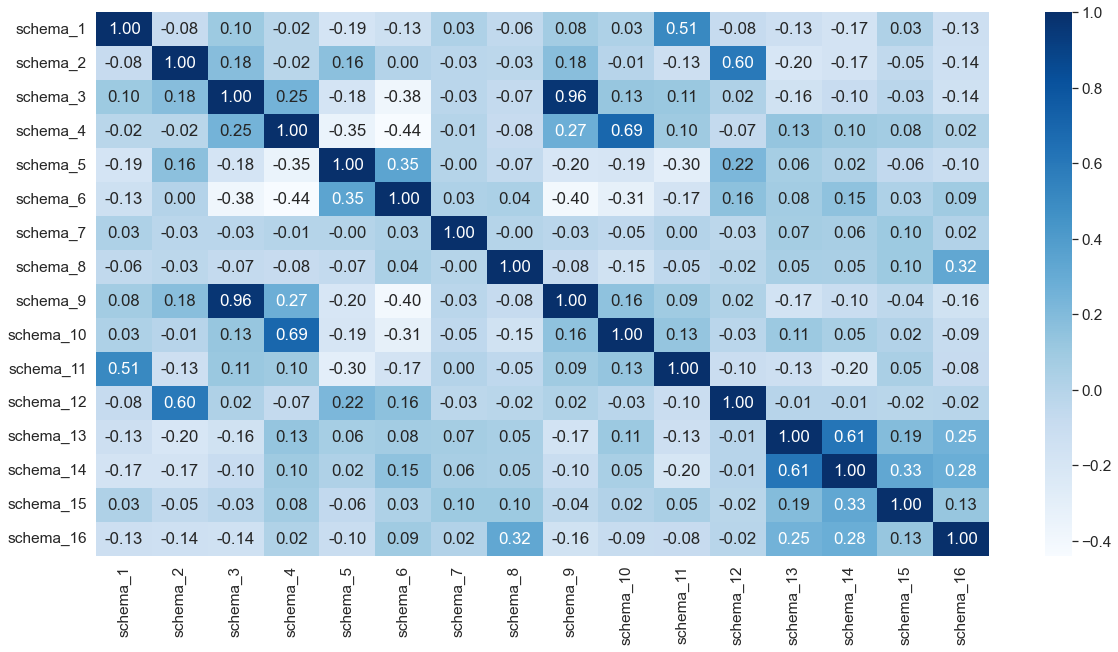

In [13]:
corr = df[df.filename == 'SOP1.dat'][numeric_columns].corr(method='spearman')
plt.figure(figsize=(20, 10))
sns.heatmap(corr, cmap='Blues', annot=True, fmt='.2f')

<p> - Исходя из взаимно-корреляционных функций, можно сделать вывод, что высокой прямой корреляцией обладают схемы 3-9, 4-10, 1-11. Схемы 8-16 обладают высокой корреляцией на основе метода Пирсона и более низкой на основе метода Спирмана. Высокая прямая корреляция свидетельствует о принадлежности методов к одной группе. </p>
<p> - Обратная корреляция наблюдается у схем 3-6, 4-5, 4-6, 6-9. Обратная корреляция дает все основания считать, что методы противоположны (составляют сочетание эхо и теневого метода), что может послужить основанием для выбора при предсказании дефектов </p>

Визуализация схем прозвучивания для файла SOP1

In [15]:
def draw_plots(filename):
    fig, axs = plt.subplots(16, 1, figsize=(20, 60))
    for k in range(16):
        axs[k].plot(df[df.filename == filename]['index'], df[df.filename == filename][f'schema_{k+1}'])
        axs[k].set_xlabel(f'schema_{k+1}', fontsize=font)
        axs[k].set_title(filename, fontsize=font)
    plt.tight_layout()

In [17]:
def draw_2_plots(schema_1, schema_2):
    plt.figure(figsize=(20, 5))
    plt.plot(df[df.filename == 'SOP1.dat']['index'], df[df.filename == 'SOP1.dat'][schema_1], label=schema_1)
    plt.plot(df[df.filename == 'SOP1.dat']['index'], df[df.filename == 'SOP1.dat'][schema_2], label=schema_2)
    plt.legend(fontsize=font)

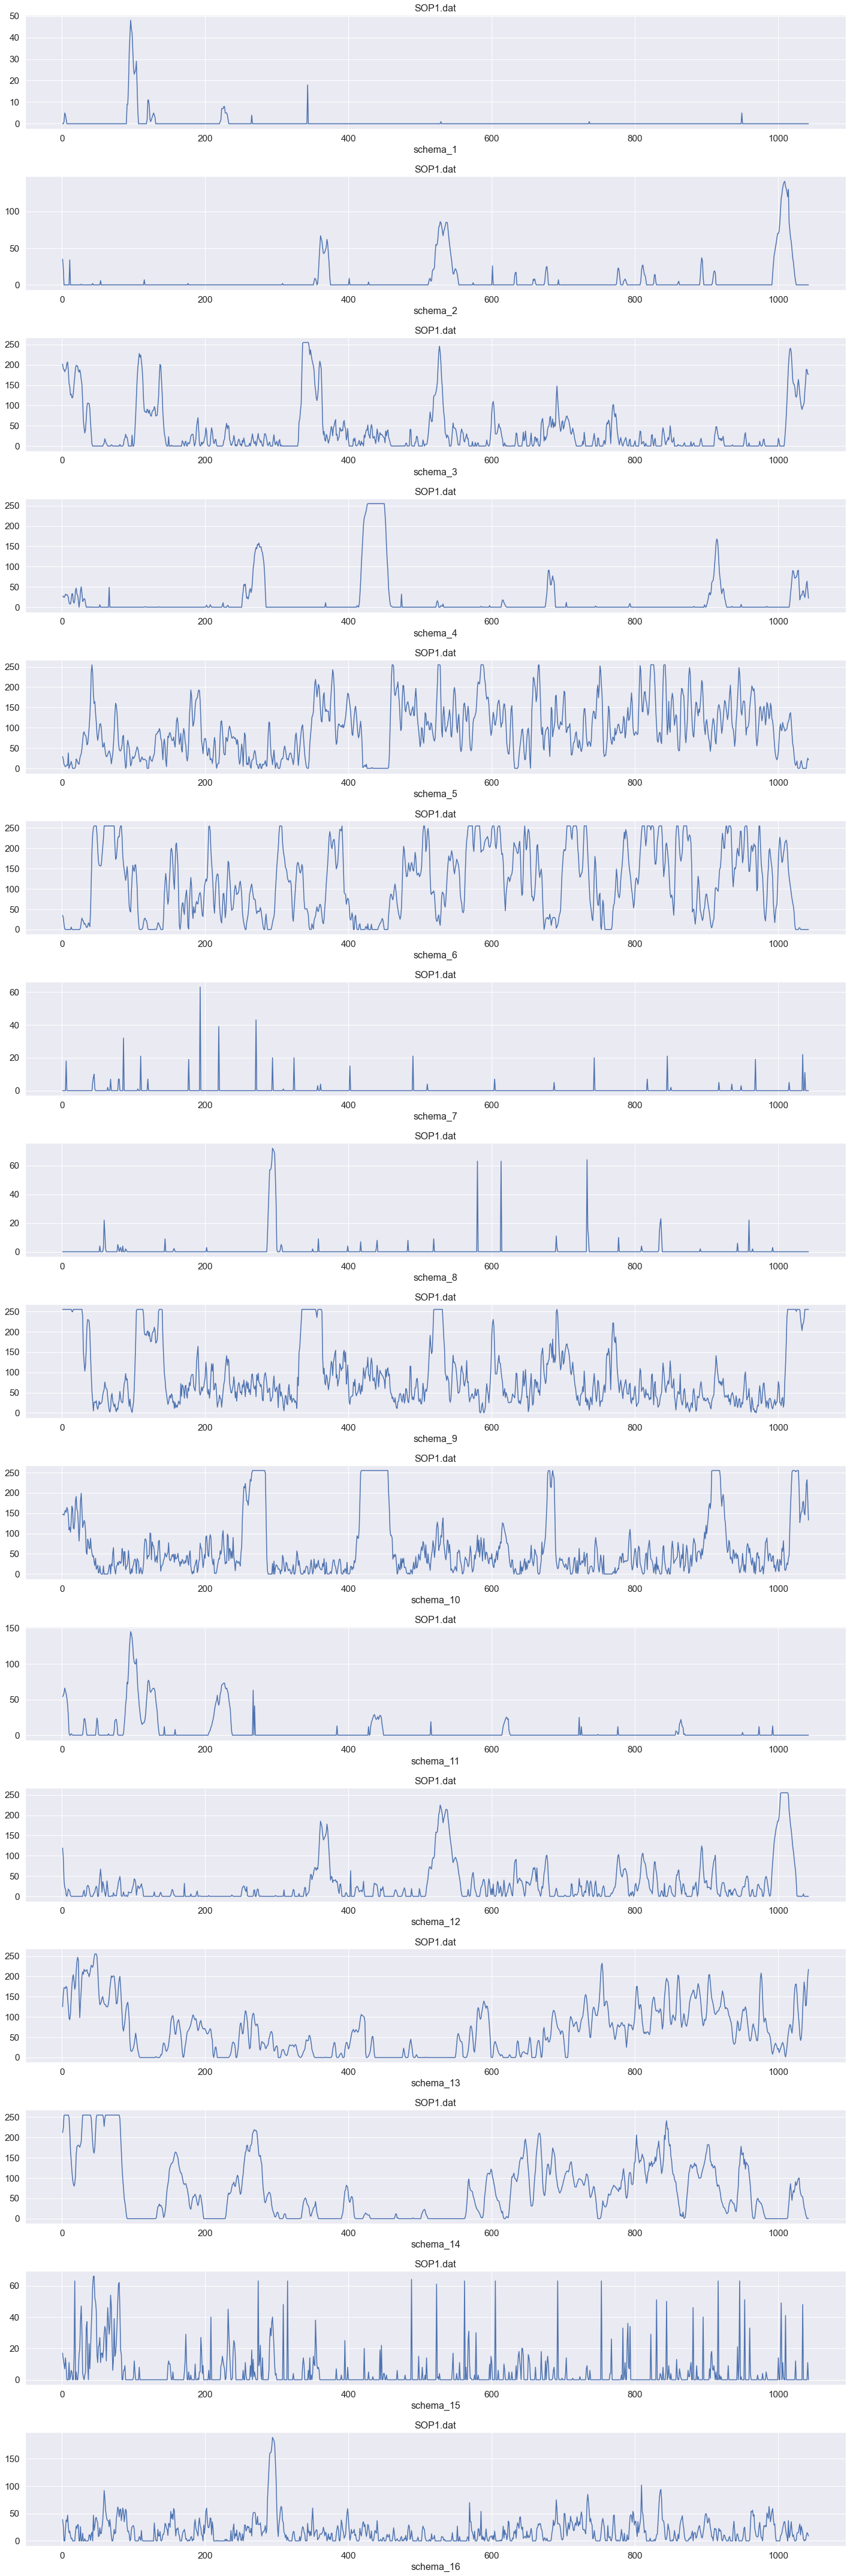

In [16]:
draw_plots('SOP1.dat')

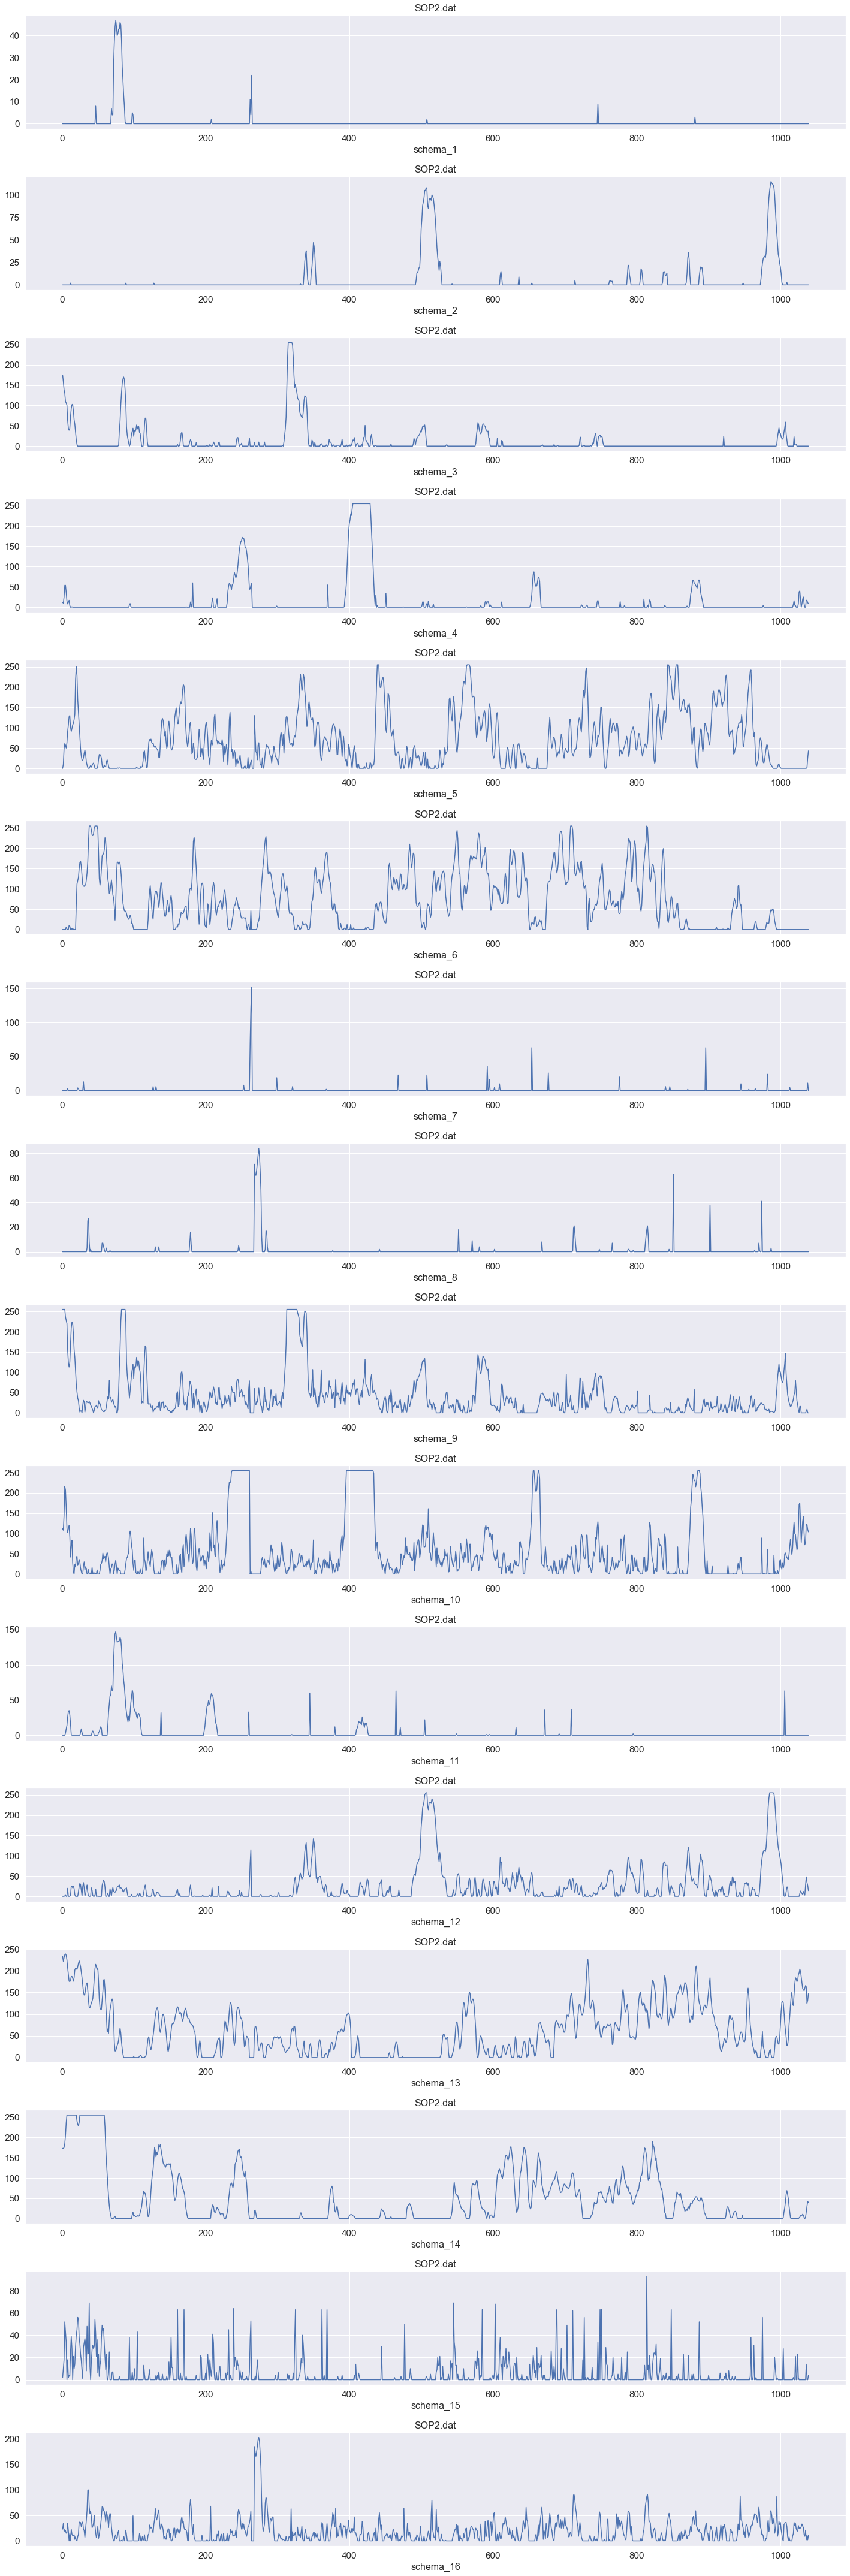

In [22]:
draw_plots('SOP2.dat')

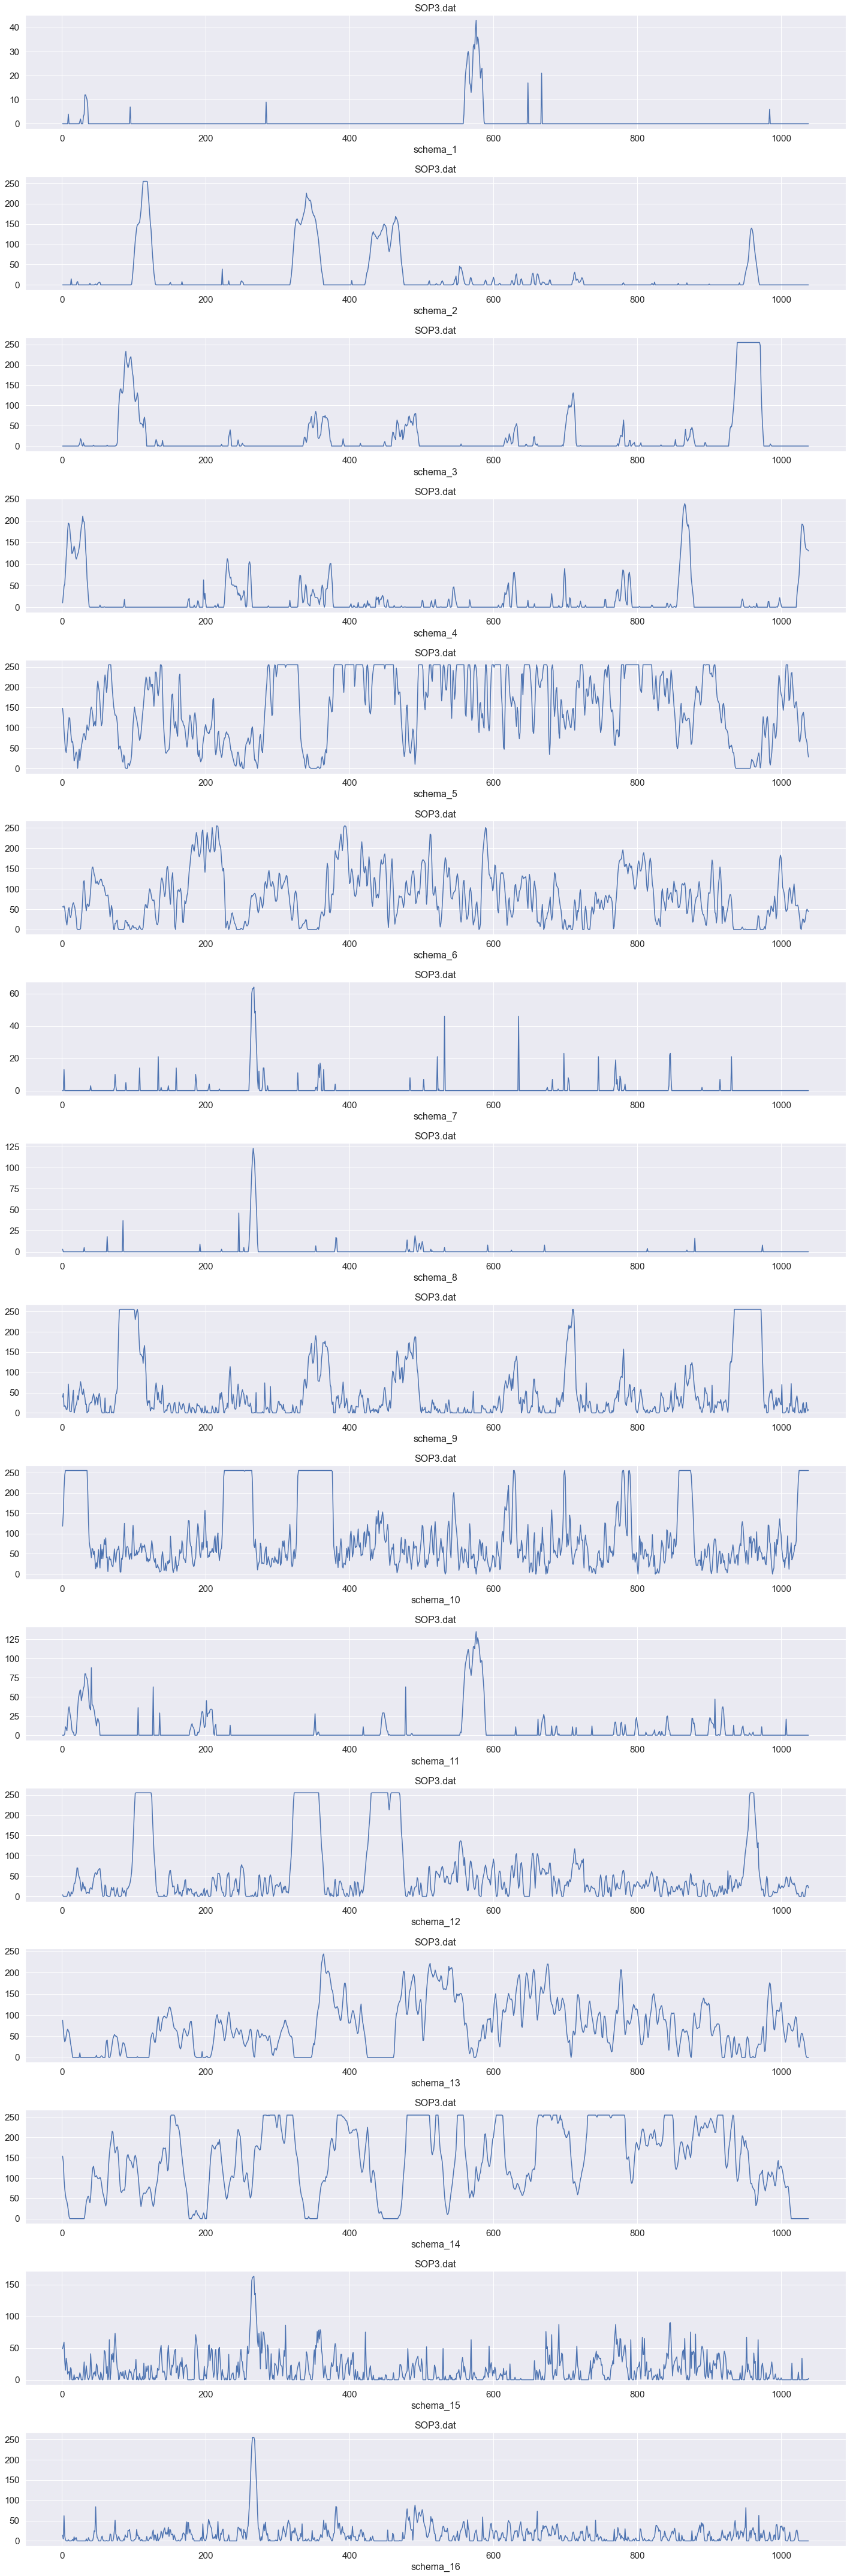

In [23]:
draw_plots('SOP3.dat')

Визуализация прямой корреляции:

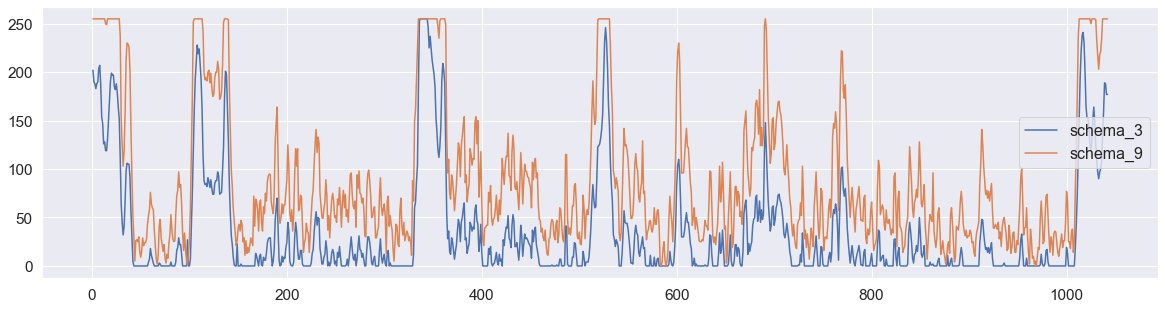

In [18]:
draw_2_plots('schema_3', 'schema_9')

Визуализация обратной корреляции:

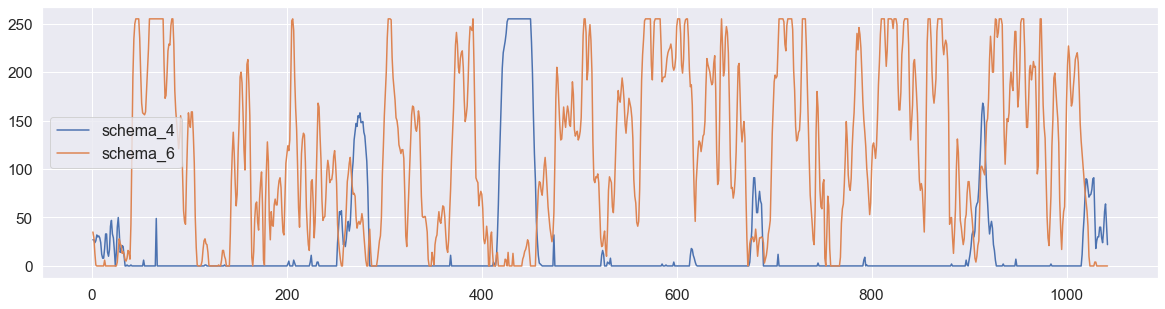

In [21]:
draw_2_plots('schema_4', 'schema_6')

**Как определить расстояние между схемами прозвучивания по матрице корреляции??!?!?!??!?!**

### 2. ОПРЕДЕЛЕНИЕ СХЕМ ПРОЗВУЧИВАНИЯ

![tG](table.png)

### 3.  ПРИВЕДЕНИЕ К ОБЩЕЙ КООРДИНАТЕ

Для удаление шумов необходимо воспользоваться скользящей средней

In [36]:
window = 5
df_rolled = []
for filename in ['SOP1.dat', 'SOP2.dat', 'SOP3.dat']:
    df_rolled.append(df[df.filename == filename][numeric_columns].rolling(window=window).mean().fillna(value=0))

Визуализация сглаживания

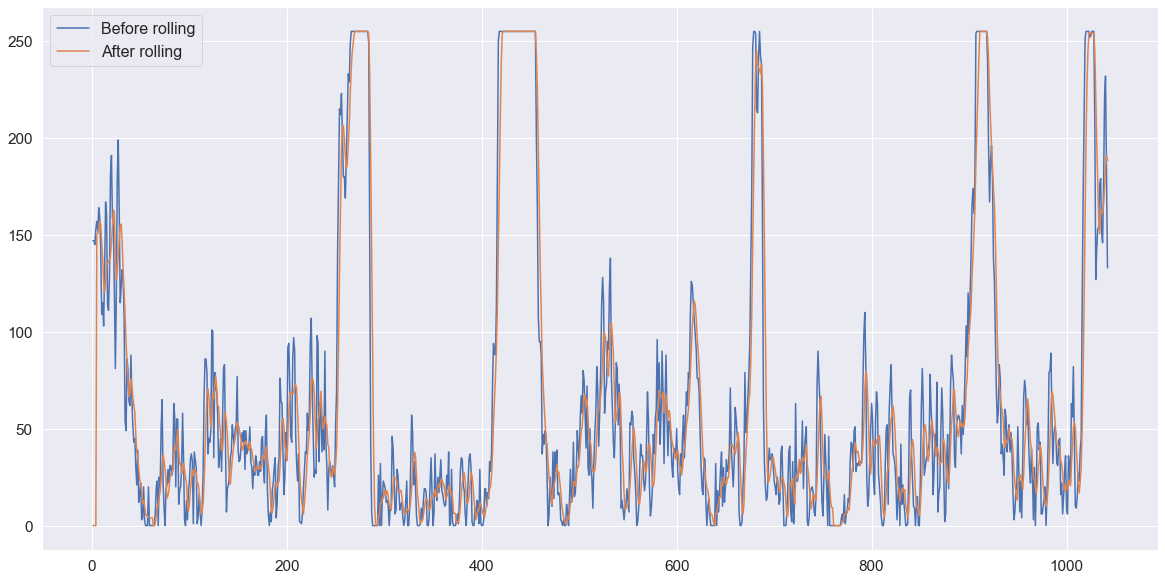

In [35]:
plt.figure(figsize=(20, 10))
plt.plot(df[df.filename == 'SOP1.dat']['index'], df[df.filename == 'SOP1.dat']['schema_10'], label='Before rolling')
plt.plot(df_rolled[df_rolled.filename == 'SOP1.dat']['index'], df_rolled[df_rolled.filename == 'SOP1.dat']['schema_10'], label='After rolling')
plt.legend(fontsize=font)

In [40]:
df_rolled = pd.concat(df_rolled)
s
df_rolled

In [48]:
df_rolled.to_csv('df_rolled.csv', index=False)